In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Classifier Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Guardar modelo
import pickle


In [34]:
ds = pd.read_csv('/workspaces/Elreno23-machine-learning-python-template/data/raw/04-decission-tree-diabetes.csv')
df = pd.DataFrame(ds)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
df.info()
null = df.isna().sum()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [36]:
df.duplicated()
(df == 0).sum()



Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

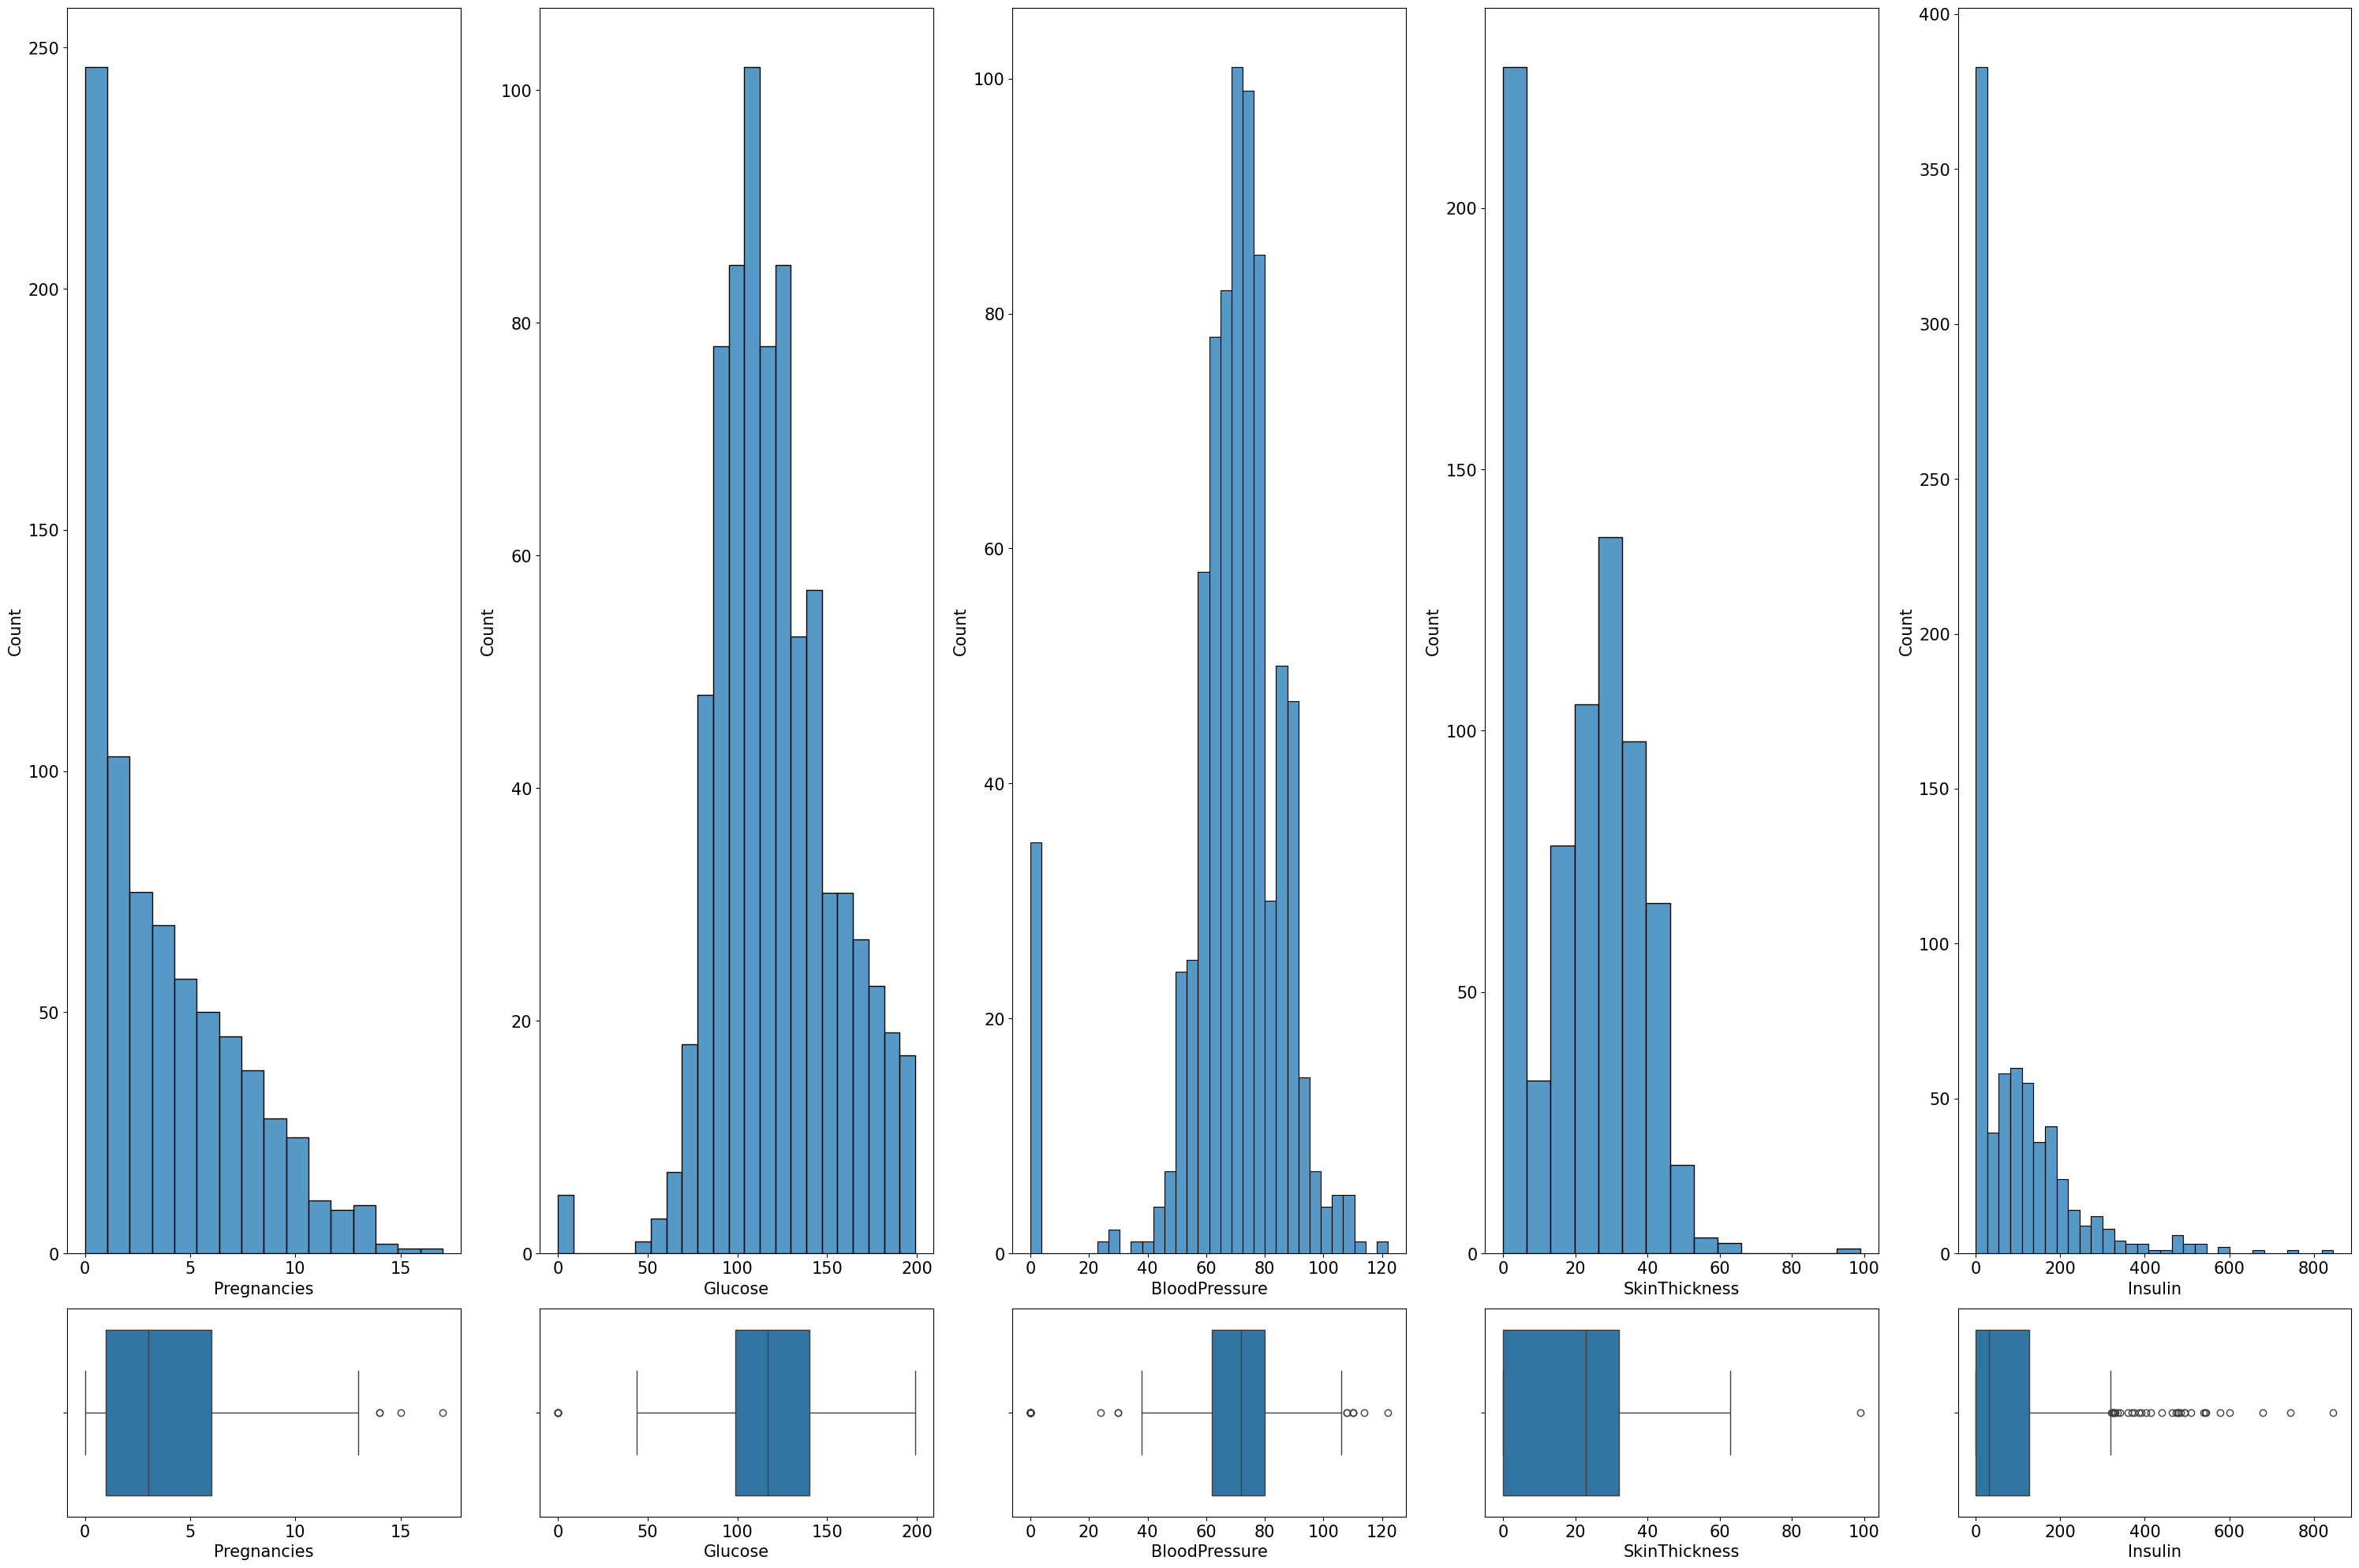

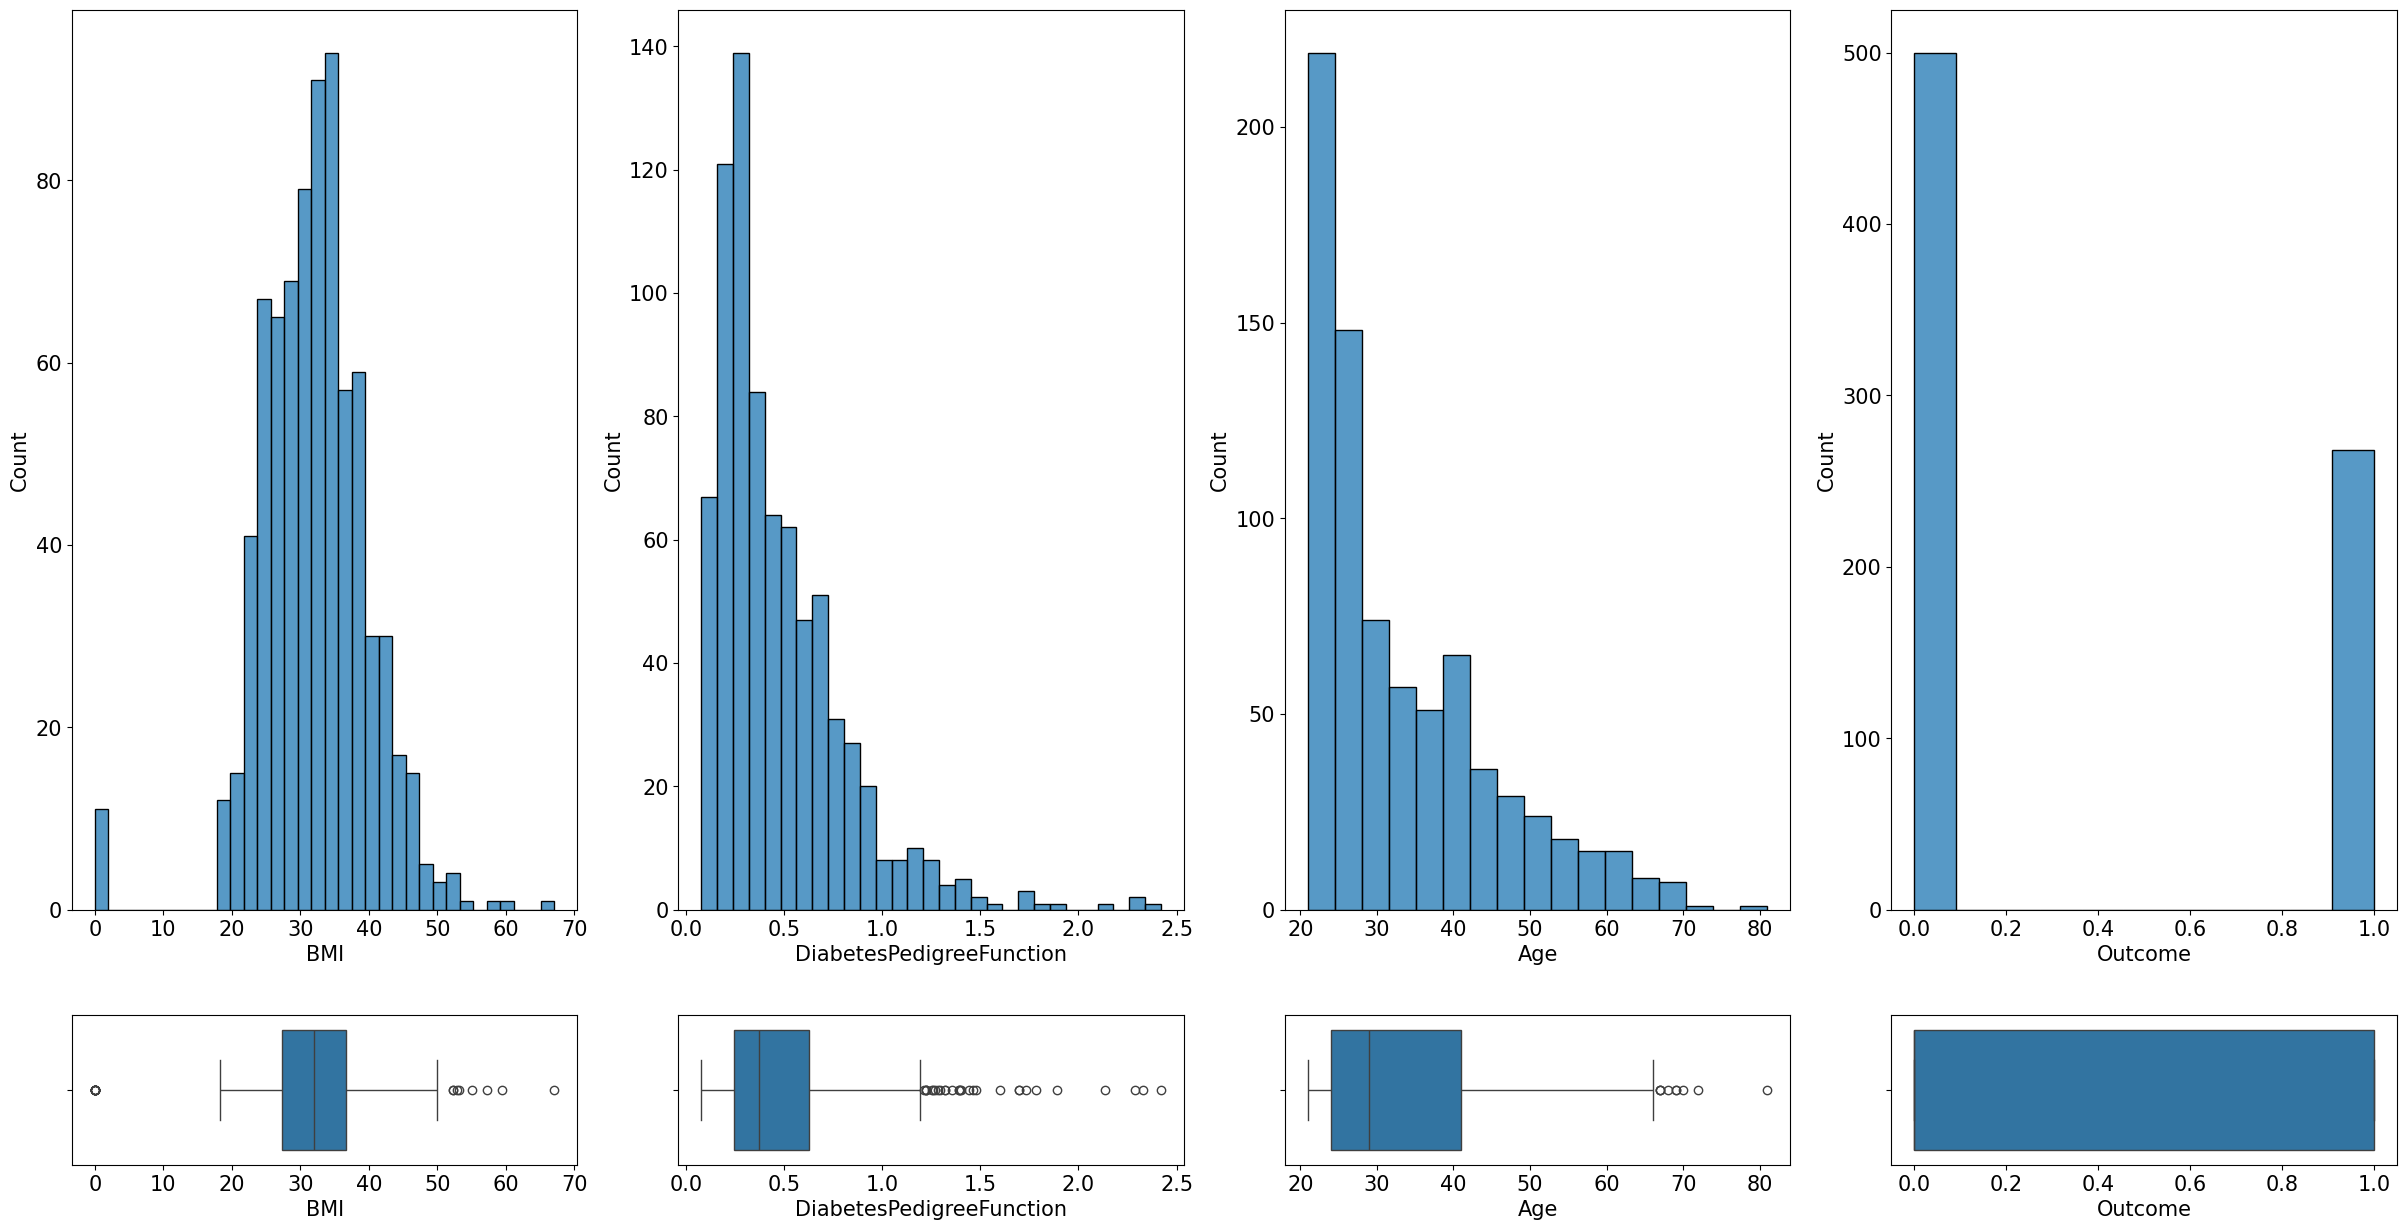

In [37]:
fig, axis = plt.subplots(2, 5, figsize=(30, 20), gridspec_kw={'height_ratios': [6, 1]})

# etiquetas de ejes y ticks con tamaño de letra 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 15

sns.histplot(ax=axis[0, 0], data=df, x='Pregnancies')
sns.boxplot(ax=axis[1, 0], data=df, x='Pregnancies')

sns.histplot(ax=axis[0, 1], data=df, x='Glucose')
sns.boxplot(ax=axis[1, 1], data=df, x='Glucose')

sns.histplot(ax=axis[0, 2], data=df, x='BloodPressure')
sns.boxplot(ax=axis[1, 2], data=df, x='BloodPressure')

sns.histplot(ax=axis[0, 3], data=df, x='SkinThickness')
sns.boxplot(ax=axis[1, 3], data=df, x='SkinThickness')

sns.histplot(ax=axis[0, 4], data=df, x='Insulin')
sns.boxplot(ax=axis[1, 4], data=df, x='Insulin')

plt.tight_layout()
plt.show()

fig, axis = plt.subplots(2, 4, figsize=(30, 15), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax=axis[0, 0], data=df, x='BMI')
sns.boxplot(ax=axis[1, 0], data=df, x='BMI')

sns.histplot(ax=axis[0, 1], data=df, x='DiabetesPedigreeFunction')
sns.boxplot(ax=axis[1, 1], data=df, x='DiabetesPedigreeFunction')

sns.histplot(ax=axis[0, 2], data=df, x='Age')
sns.boxplot(ax=axis[1, 2], data=df, x='Age')

sns.histplot(ax=axis[0, 3], data=df, x='Outcome')
sns.boxplot(ax=axis[1, 3], data=df, x='Outcome')

plt.tight_layout
plt.show()

### Conclusiones

Podemos observar un comportamiento con sentido en los histplot, como por ejemplo en la variable pregnancies, donde la tendencia es clara: la mayoría de los datos corresponden a personas que no han tenido hijos. En insulin también se ve algo llamativo: muchos valores están en cero. Esto lo detectamos en la parte de limpieza inicial y podemos deducir que esos ceros representan datos faltantes, no valores reales.

En los boxplot se empiezan a visualizar outliers en varias variables, como BMI e incluso glucose. Estos valores extremos serán tratados más adelante según lo que consideremos correcto: ya sea eliminarlos, imputarlos o dejarlos si no afectan el modelo.


### numericas vs numericas

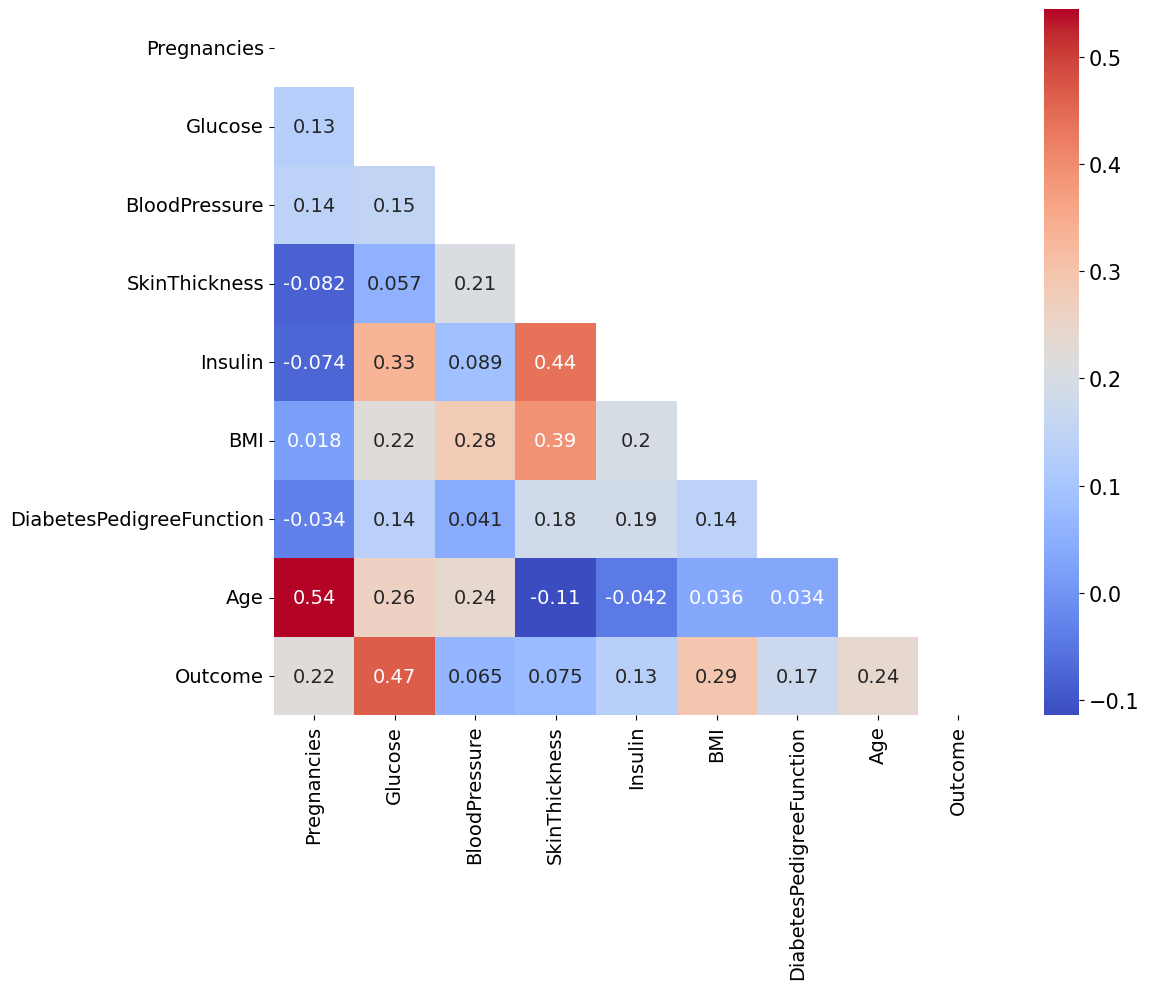

In [38]:
plt.figure(figsize=(12, 10))

# Crear la máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Dibujar el heatmap con la máscara aplicada
sns.heatmap(df.corr(), mask=mask, annot=True, cmap="coolwarm", annot_kws={"size": 14})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()



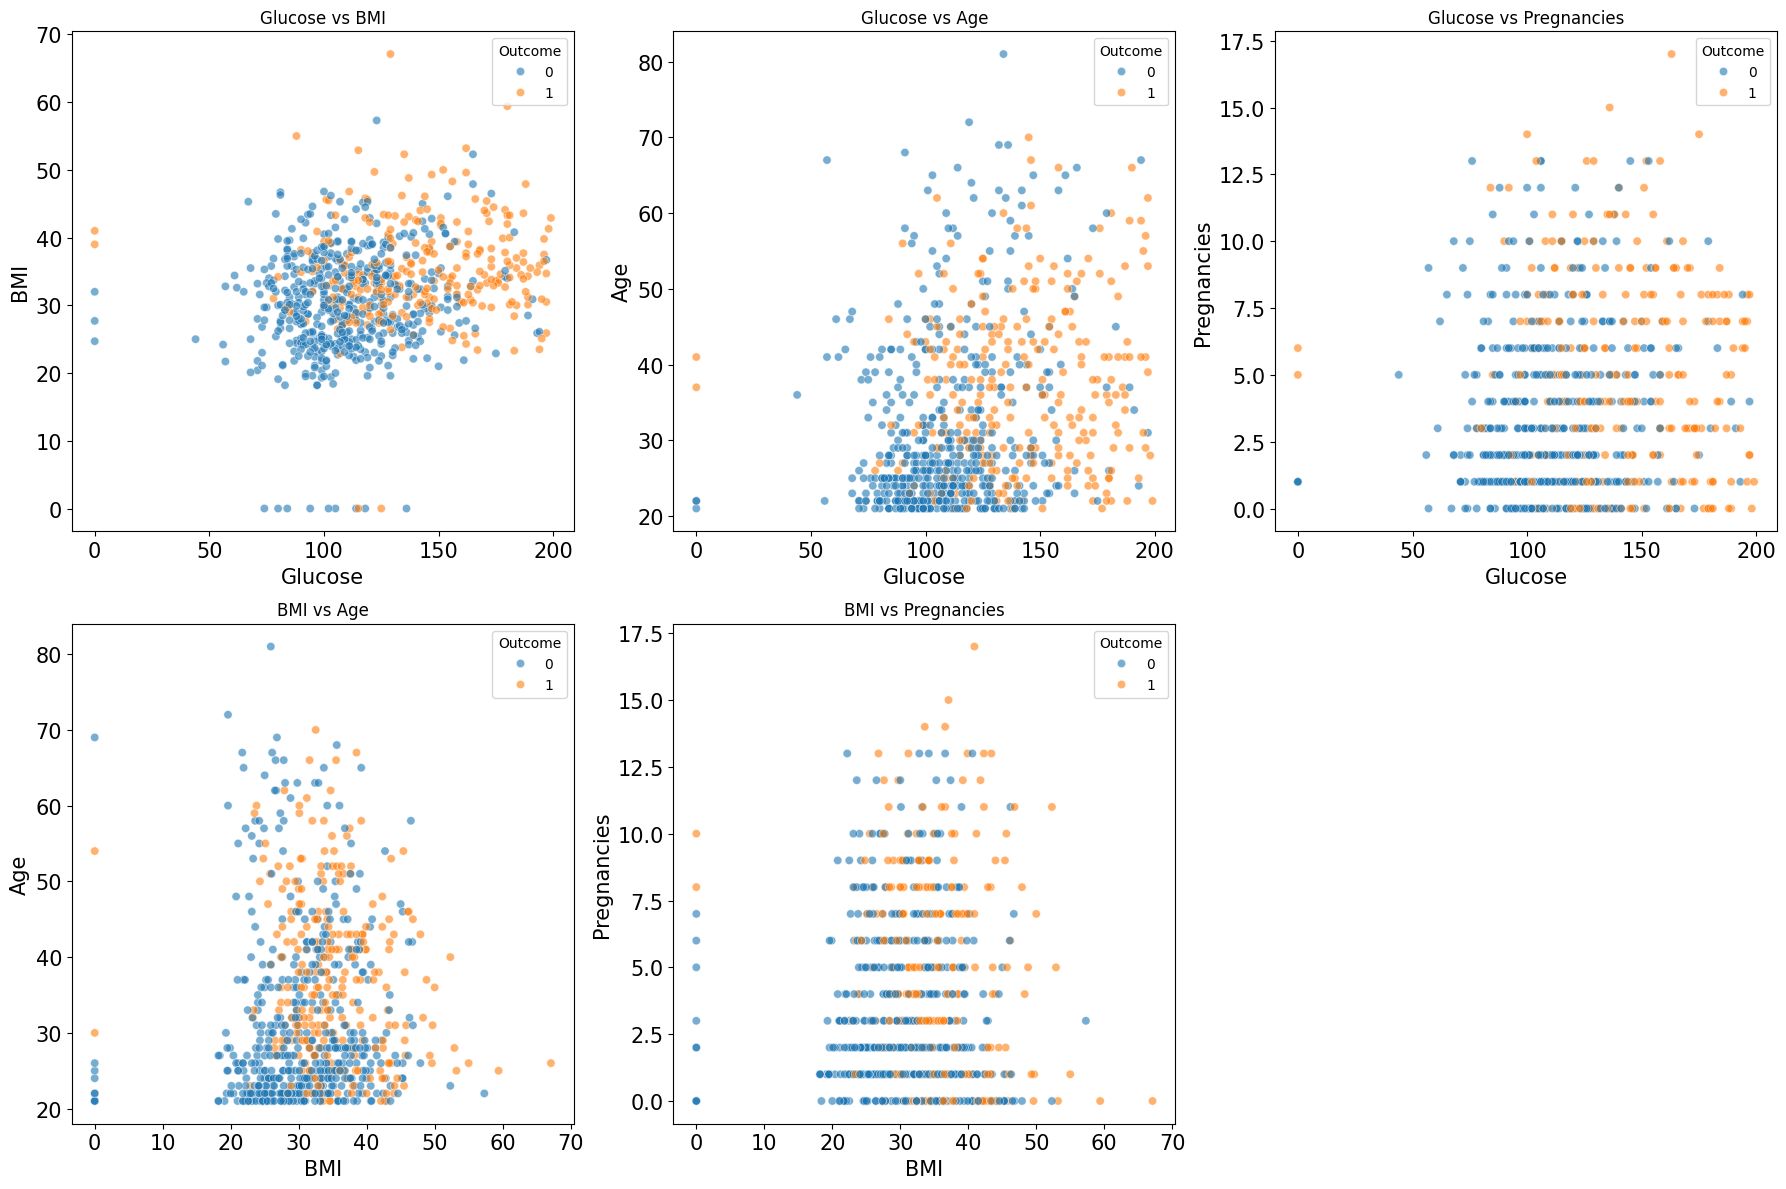

In [39]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

sns.scatterplot(x="Glucose", y="BMI", data=df, hue="Outcome", alpha=0.6, ax=axs[0][0])
axs[0][0].set_title("Glucose vs BMI")

sns.scatterplot(x="Glucose", y="Age", data=df, hue="Outcome", alpha=0.6, ax=axs[0][1])
axs[0][1].set_title("Glucose vs Age")

sns.scatterplot(x="Glucose", y="Pregnancies", data=df, hue="Outcome", alpha=0.6, ax=axs[0][2])
axs[0][2].set_title("Glucose vs Pregnancies")

sns.scatterplot(x="BMI", y="Age", data=df, hue="Outcome", alpha=0.6, ax=axs[1][0])
axs[1][0].set_title("BMI vs Age")

sns.scatterplot(x="BMI", y="Pregnancies", data=df, hue="Outcome", alpha=0.6, ax=axs[1][1])
axs[1][1].set_title("BMI vs Pregnancies")


axs[1][2].axis("off")

plt.tight_layout()
plt.show()

### Conclusiones

En este análisis observamos cómo se relacionan entre sí las variables numéricas y cómo se vinculan con la variable objetivo Outcome. A partir de la matriz de correlación, identificamos cinco variables que tienen correlación positiva con el diagnóstico de diabetes (Outcome): Pregnancies, BMI, Age, Glucose y Insulin. Aunque la correlación no es extremadamente alta, sí hay una tendencia clara.

En los scatterplot se ven patrones interesantes. Por ejemplo:

En la relación entre BMI y Glucose con respecto a Outcome, se nota que los puntos naranjas (personas con diabetes) tienden a agruparse hacia la derecha, lo que indica niveles de glucosa más altos.

Lo mismo ocurre en el gráfico de Glucose vs Age, donde se observa que personas mayores de 40 con glucosa elevada tienen más probabilidad de ser diabéticas.

Estas observaciones refuerzan la idea de que ciertas variables como edad y glucosa tienen un peso importante en el diagnóstico.

### A-numericas vs categoricas

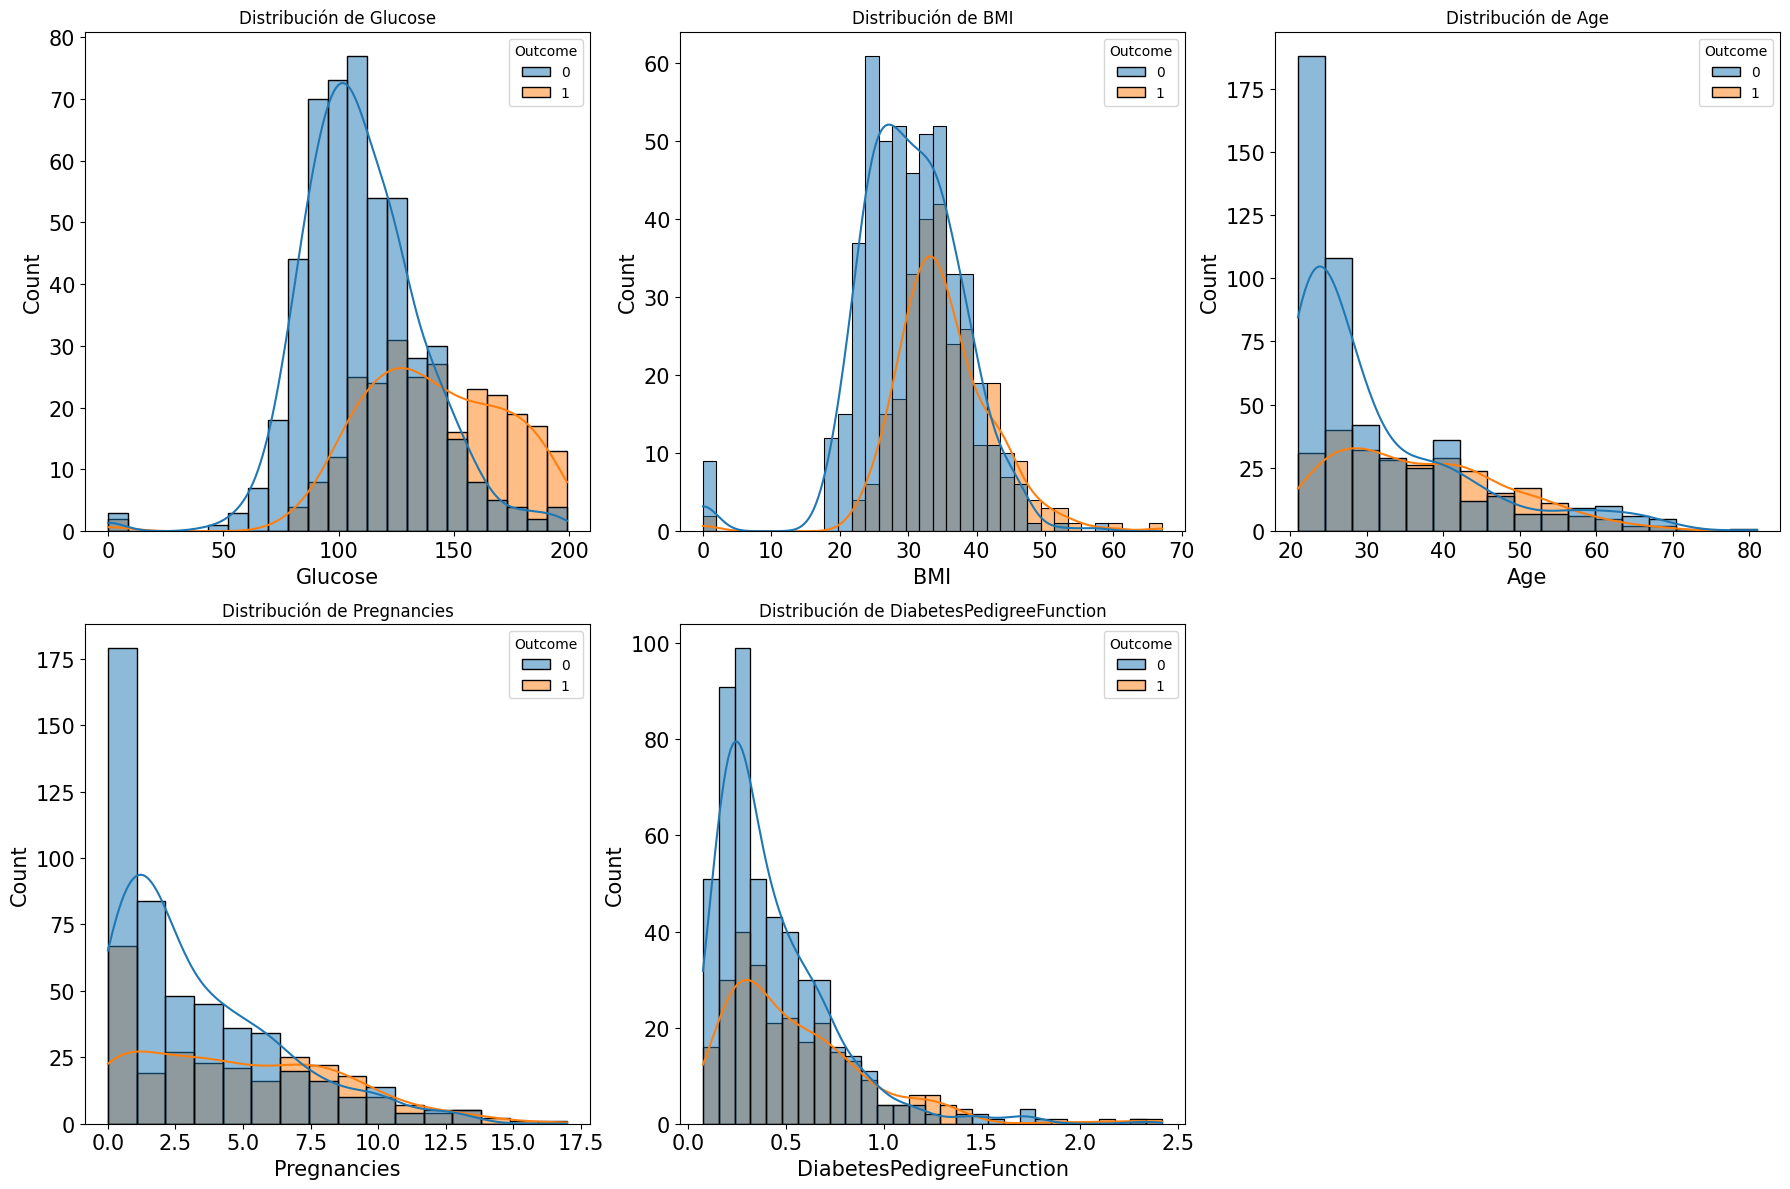

In [40]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# KDE = Kernel Density Estimation (Estimación de Densidad por Núcleo).
# En vez de mostrar solo barras (histograma), dibuja una curva continua que indica dónde se concentran más los valores.
sns.histplot(data=df, x="Glucose", hue="Outcome", kde=True, ax=axs[0][0])
axs[0][0].set_title("Distribución de Glucose")

sns.histplot(data=df, x="BMI", hue="Outcome", kde=True, ax=axs[0][1])
axs[0][1].set_title("Distribución de BMI")

sns.histplot(data=df, x="Age", hue="Outcome", kde=True, ax=axs[0][2])
axs[0][2].set_title("Distribución de Age")

sns.histplot(data=df, x="Pregnancies", hue="Outcome", kde=True, ax=axs[1][0])
axs[1][0].set_title("Distribución de Pregnancies")

sns.histplot(data=df, x="DiabetesPedigreeFunction", hue="Outcome", kde=True, ax=axs[1][1])
axs[1][1].set_title("Distribución de DiabetesPedigreeFunction")

axs[1][2].axis("off")

plt.tight_layout()
plt.show()

### Conclusiones

En los histplot podemos observar cómo ciertas variables numéricas se comportan según el diagnóstico de diabetes (Outcome):

En el caso de Glucose, la tendencia es clara: Las personas con valores más altos de glucosa tienden a ser diabéticas. Esto se ve en cómo la curva de Outcome = 1 se desplaza hacia la derecha.

En BMI, aunque la diferencia no es tan marcada, sí se nota que un IMC más alto puede influir en el diagnóstico. La curva de los diabéticos está ligeramente más cargada hacia valores altos.

En Age, la evidencia no es tan clara. Personas con la misma edad pueden ser o no diabéticas, lo que indica que la edad por sí sola no determina el diagnóstico, aunque puede aportar en combinación con otras variables.

In [41]:
df["Outcome"].value_counts()
df.isna().sum()


df = df.drop(["Insulin","SkinThickness","BloodPressure"],axis=1)


df = df[df["BMI"] <= 50]
df["BMI"].replace(0, np.nan, inplace=True) # Convertir los 0 en NaN
df["BMI"].fillna(df["BMI"].median(), inplace=True) # Imputarlos con la mediana


df["Glucose"].replace(0, np.nan, inplace=True)
df["Glucose"].fillna(df["Glucose"].median(), inplace=True)


df = df[df["DiabetesPedigreeFunction"] <= 1.3]

df = df[df["Age"] < 75]

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               740 non-null    int64  
 1   Glucose                   740 non-null    float64
 2   BMI                       740 non-null    float64
 3   DiabetesPedigreeFunction  740 non-null    float64
 4   Age                       740 non-null    int64  
 5   Outcome                   740 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 40.5 KB


/tmp/ipykernel_796/3154081289.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BMI"].replace(0, np.nan, inplace=True) # Convertir los 0 en NaN
/tmp/ipykernel_796/3154081289.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

### Conclusiones

Decidí deshacerme de varias columnas que no mostraban una correlación notable con respecto a Outcome. Además, muchas de ellas tenían demasiados datos faltantes, lo que hacía inviable una imputación fiable, especialmente teniendo tan pocos registros. Aunque algunas sí tenían correlación con otras variables, no aportaban valor directo al modelo.

En cambio, columnas como BMI y Glucose, que sí tienen peso en la predicción y no presentaban tantos ceros, fueron imputadas por la mediana. Esto nos permitió conservar su aporte sin distorsionar la distribución.

Respecto a DiabetesPedigreeFunction, decidimos quedarnos con la zona donde había mayor concentración de datos, descartando los extremos que podían generar ruido. También eliminamos outliers en Age que no aportaban valor al modelo y podían afectar la estabilidad de los coeficientes.

In [42]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [44]:
dt_classifier_model = DecisionTreeClassifier(random_state=18, max_depth=4)
dt_classifier_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,18
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Conclusiones

Separamos las variables independientes (X) y la variable objetivo (y) para entrenar el modelo. Apartamos un 80 % de los datos para entrenamiento y un 20 % para test, garantizando una evaluación justa del rendimiento.

Luego inicializamos el modelo de árbol de decisión clasificatorio y lo entrenamos con el método fit utilizando los datos de entrenamiento. Además, limitamos las divisiones que el árbol puede hacer mediante el parámetro max_depth, con el objetivo de evitar el sobreajuste, es decir, que el modelo memorice los datos en lugar de generalizar patrones útiles.

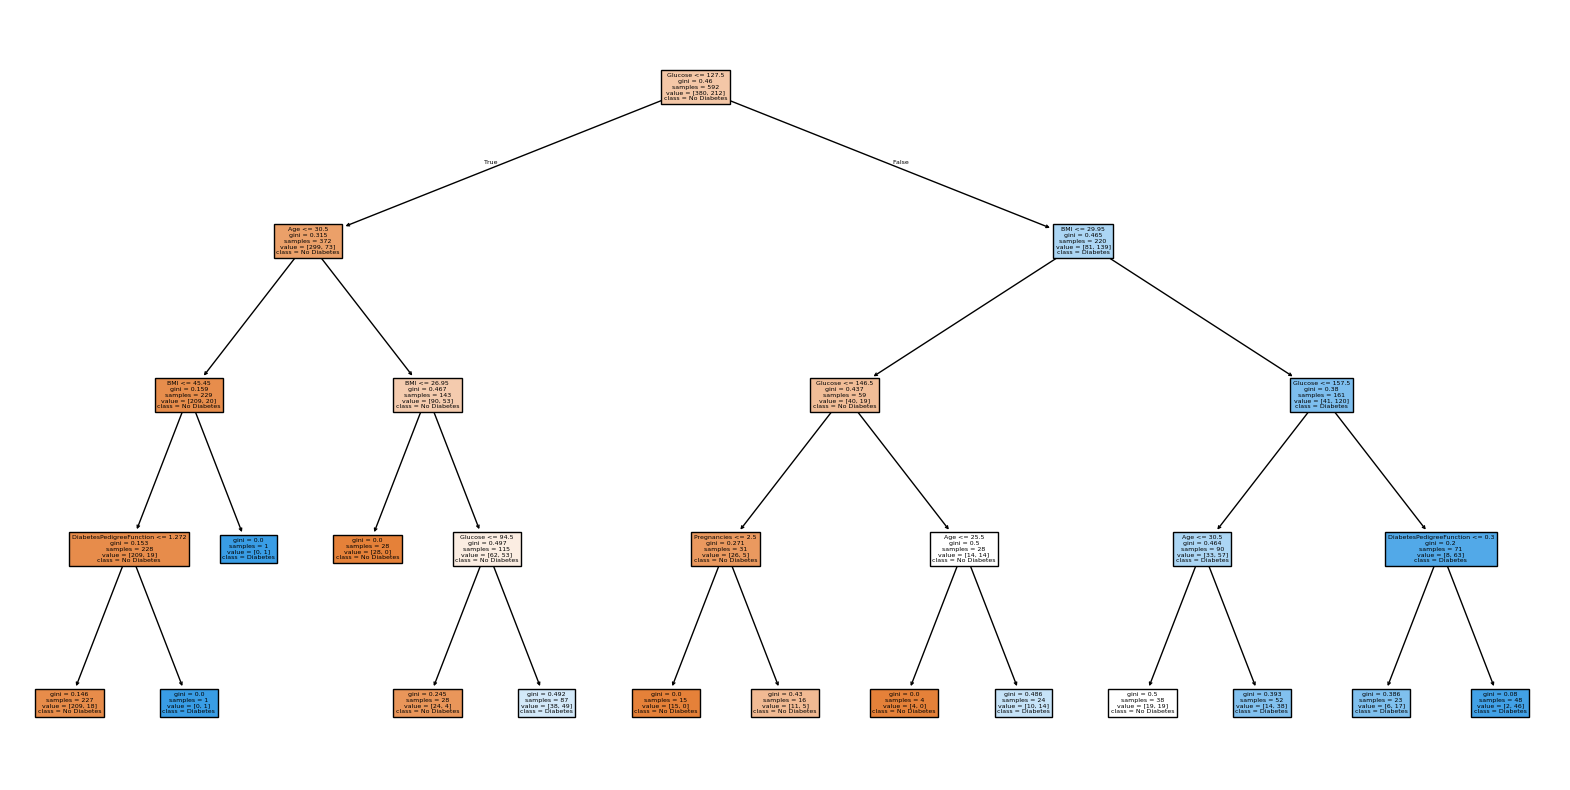

In [45]:
plt.figure(figsize=(20, 10))

tree.plot_tree(dt_classifier_model, 
               feature_names=list(X_train.columns),
               class_names=['No Diabetes','Diabetes'],
               filled=True)
plt.show()

### Conclusiones
Cada nodo o hoja del árbol posee:
-Condición de división: la regla que separa los datos (ej. Glucose <= 127.5).

-Pureza del nodo: indica si los registros pertenecen a una sola clase (diabéticos/no diabéticos), siempre en relación con la variable objetivo (Outcome).
Más cercano a 0 → nodo puro (todos los registros son de la misma clase).
Más cercano a 1 → nodo impuro (mezcla de clases).

-Samples: número de registros que llegan a ese nodo.

-Value: distribución de registros por clase (ej. [500, 268]).

-Class: la clase dominante en ese nodo, es decir, la predicción que hace el modelo.

El grafico d eeste modelo me recuerda mucho a un diagrama de flujo

In [50]:
y_pred_test = dt_classifier_model.predict(X_test)
y_pred_train = dt_classifier_model.predict(X_train)
y_pred_test, y_pred_train

(array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0

### Conclusion

El metodo predict nos dice que tambien entrenamos el modelo. Con x_test nos dice que tan bie generaliza datos nuevos  y con x_train que tan bien el modelo aprendio de los datos que ya conocia.

-Si el modelo va muy bien en train pero mal en test, está memorizando.

-Si va bien en ambos, está generalizando correctamente.


In [47]:
def get_classifier_metrics(y_predict_test, y_test, y_predict_train, y_train, average='weighted'):
    metrics_train = (accuracy_score(y_train, y_predict_train),
                     f1_score(y_train, y_predict_train, average=average),
                     precision_score(y_train, y_predict_train, average=average),
                     recall_score(y_train, y_predict_train, average=average))
    metrics_test = (accuracy_score(y_test, y_predict_test),
                    f1_score(y_test, y_predict_test, average=average),
                    precision_score(y_test, y_predict_test, average=average),
                    recall_score(y_test, y_predict_test, average=average))
    return pd.DataFrame(data=[metrics_train, metrics_test],
                        columns=['Accuracy', 'F1 Score', 'Precision', 'Recall'],
                        index=['Train set', 'Test set'])

result = get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train, average='weighted')
result

,Accuracy,F1 Score,Precision,Recall
Train set,0.804054,0.806108,0.810840,0.804054
Test set,0.770270,0.774789,0.781902,0.770270


### Conclusiones

Comparamos las predicciones del modelo con los valores reales y calculamos las métricas de rendimiento (Accuracy, F1 Score, Precision y Recall).

Esto nos permite evaluar dos aspectos fundamentales:

-Qué tan bien aprendió el modelo a partir de los datos de entrenamiento.

-Qué tan bien generaliza cuando se enfrenta a datos nuevos que nunca había visto.

Basicamente que tan bueno es nuestro modelo

El modelo logra un buen equilibrio: aprende bien en entrenamiento y generaliza en test sin sobreajustar. Sus métricas son consistentes (0.77–0.81 en todo), lo que indica que es un modelo sólido para clasificar diabetes en este dataset.

In [48]:
with open('/workspaces/Elreno23-machine-learning-python-template/src/diabetes-decision-tree-classifier.pkl', 'wb') as file:
    pickle.dump(dt_classifier_model, file)